In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys

sys.path.insert(0, '/Users/josue/kosmos/')

In [2]:
import kosmos
DISPLAY = True

In [3]:
kosmos.__version__

'0.1'

In [12]:
#checks the filter
def what_filter(k):
    j = []
    for i in k:
        hdu_list = fits.open(i)
        a = hdu_list[0].header['FILTER']
        j.append(a)
    print("Filters:")
    return j

# Creats a directory array
def dir_array(j):
    i = pd.read_table(dir_1 + j, names=['impath'])
    k = dir_1 + i['impath'].values
    #print(k)
    return k

In [5]:
dir = 'C:/Users/josue/!Work space/data/07082022/'
biasfiles_i = pd.read_table(dir + 'bias_08.txt', names=['impath'])
biasfiles = dir + biasfiles_i['impath'].values
biasfiles

array(['C:/Users/josue/!Work space/data/07082022/bias_001.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_002.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_003.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_004.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_005.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_006.fits',
       'C:/Users/josue/!Work space/data/07082022/bias_007.fits'],
      dtype=object)

(512, 512)


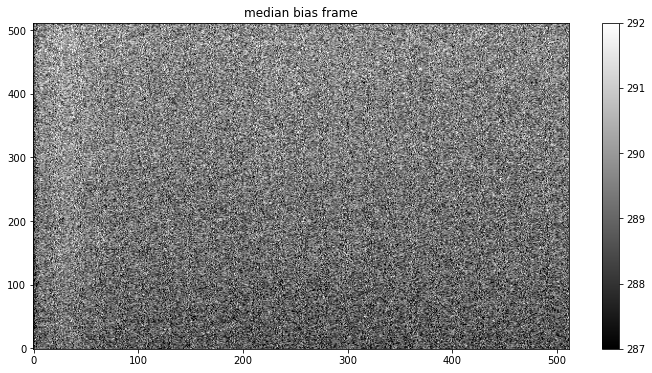

In [6]:
bias = kosmos.biascombine(biasfiles) 
print(bias.shape)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
    plt.title('median bias frame')
    plt.clim(np.percentile(bias, (5, 98)))
    cb = plt.colorbar()

In [9]:
dir_1 = 'C:/Users/josue/!Work space/data/07102022/'

In [14]:
# dome flats
dome_flats_r = dir_array('dome_flats_r.txt')
dome_flats_r

array(['C:/Users/josue/!Work space/data/07102022/domeflat_20s_r_0.fits',
       'C:/Users/josue/!Work space/data/07102022/domeflat_20s_r_01.fits',
       'C:/Users/josue/!Work space/data/07102022/domeflat_20s_r_02.fits'],
      dtype=object)

C:\Users\josue\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


(512,)
(512, 512)
adu / s


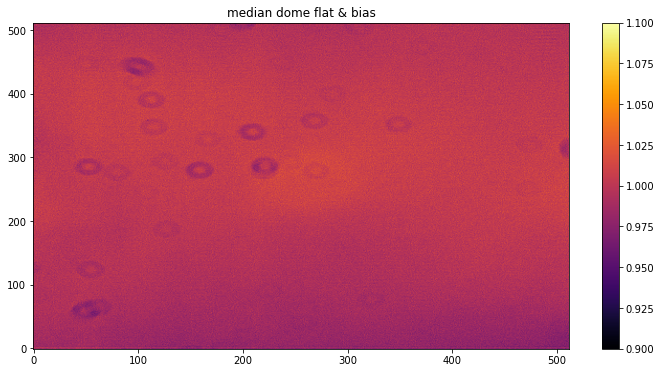

In [16]:
# B filter dome master flat
flat_r, ilum_r = kosmos.flatcombine(dome_flats_r, bias=bias, trim=None)

print(ilum_r.shape) # this is the indicies that are illuminated
print(flat_r.shape)
print(flat_r.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_r, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median dome flat & bias')
    cb = plt.colorbar()

(512, 512)
adu / s


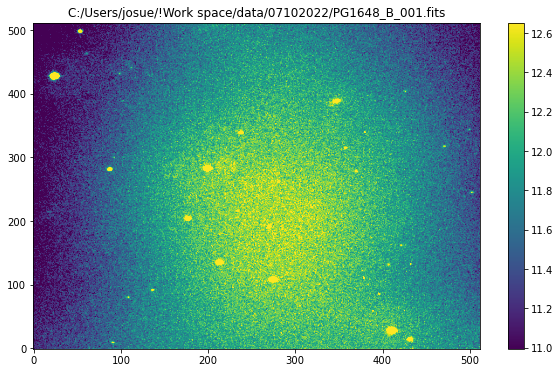

In [25]:
# NGC 7318 in the r filter
sci = dir_1 + 'PG1648_B_001.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum_r, flat=flat_r, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)